In [1]:

# Python Project - 1 
# Project: Analyzing the naming trends using Python 
# Industry: General
# Problem Statement: 
# The dataset is in Zipped format, we have to extract the dataset in the program, visualize the number of male and female babies born in a particular year, and find out popular baby names. 
# Description: This project not only focusses on implementing data manipulation and data visualization using Pandas library, but also tests your ability to deal with real word problem statements. 
# Dataset: Popular baby names data provided by Social Security Administration (SSA) of United States
# How to download the dataset: 
# •	Go to https://www.ssa.gov/oact/babynames/limits.html
# •	Click on ‘National data’
# •	Get the zipped file
# Here’s what the zipped folder looks like, 
 
# Hints: 
# •	First, use Pandas, zipfile, and BytesIO library to extract the data. Find out a way to extract only files that consists useful data. 
# •	Hint: pd.read_csv(BytesIO(z.read(file_name)), encoding='utf-8', engine='python', header=None)
# •	Then, visualize the number of male and female babies born in a particular year with the help of pandas.DataFrame.plot, then Analyse baby names by sorting out all birth counts. 
# •	Then, analyse baby names by sorting out top 100 birth counts and group them by names to find out popular baby names


In [2]:
# Import Libraries
import pandas as pd
from io import BytesIO
from zipfile import ZipFile as z
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# Read the Data from 'yob1880.txt' file-> and glance of starting 5 rows
df = pd.read_csv('names/yob1880.txt', names = ['name','gender','birthcounts'])
df.head()

,name,gender,birthcounts
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [16]:
#Find the length of Data
len(df)

2000

In [5]:
# Glance the total male and female count
df.groupby('gender').birthcounts.sum()

gender
F     90994
M    110490
Name: birthcounts, dtype: int64

In [6]:
# Take the range of year between starting to end according to given file
years = range(1880, 1887)

In [7]:
# Initialize empty list
pieces = []

In [8]:
# Assign the name of Columns
columns = ['name','gender','birthcount']

In [9]:
#Concatenate the all text files into one combine file
for year in years:
    path = 'names/yob{}.txt'.format(year)
    columns = ['name','gender','birthcount']
    for year in years:
        path = 'names/yob{}.txt'.format(year)
        df = pd.read_csv(path, names=columns)
        df['year']=year
        pieces.append(df)
        allData = pd.concat(pieces, ignore_index=True)       

In [17]:
# Verify the length of combine Data
len(allData)

105903

In [11]:
# Take the glance of combine data 
allData.head()

,name,gender,birthcount,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [12]:
# Find the total birth in all the years 
totalbirths = allData.pivot_table('birthcount', index=['year'], columns=['gender'], aggfunc = sum)

In [13]:
# Take a glance of  birth in all years according to Male and Female gender wise
totalbirths.head()

gender,F,M
year,,
1880,636958,773430
1881,643671,705201
1882,754929,795802
1883,786233,732375
1884,903133,801094


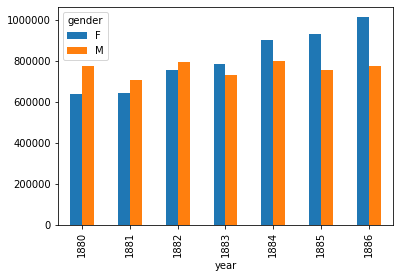

In [24]:
# Plot the bar graph for above glance
totalbirths.plot(kind='bar')
plt.show()

In [28]:
#birthcount according to Female and Male year wise
allData.groupby(['year','gender']).sum().unstack('gender').head()

birthcount        
gender          F       M
year                     
1880       636958  773430
1881       643671  705201
1882       754929  795802
1883       786233  732375
1884       903133  801094

In [36]:
# •	Then, analyse baby names by sorting out top 100 birth counts and group them by names to find out popular baby names
# calculate ratio
def add_prop(group):
    births = group.birthcount.astype(float)
    group['prop'] = births/births.sum()  # add column prop
    return group

In [37]:
names = allData.groupby(['year', 'gender']).apply(add_prop)

In [38]:
names.head()

,name,gender,birthcount,year,prop
0,Mary,F,7065,1880,0.011092
1,Anna,F,2604,1880,0.004088
2,Emma,F,2003,1880,0.003145
3,Elizabeth,F,1939,1880,0.003044
4,Minnie,F,1746,1880,0.002741
